In [1]:
from datetime import datetime
print "Last time runned on", str(datetime.now())

Last time runned on 2017-04-25 13:39:52.295954


In [2]:
from quantileRegression import quantileRegression
import numpy as np

Welcome to ROOTaaS 6.06/08


In [3]:
# Variable you want to correct
ylist = ["R9"] # , "S4", "SigmaIeIe", "EtaWidth", "PhiWidth", "CovarianceIphiIphi", "SigmaRR", 'CovarianceIetaIphi']

# Input variables used for the regression
X = ['Pt', 'ScEta', 'Phi', 'rho']  # <<-- list

In [4]:
# Set the quantiles 
quantiles = [ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9 ]
print "Number of quantiles ", len(quantiles)

Number of quantiles  9


In [5]:
# Initialize the quantile regression object for mc
qr_mc = quantileRegression("mc")

In [6]:
# This is what you want to correct
print "Load the mc dataframe"
startEvtmc = 2000000
stopEvtmc  = 4000000
qr_mc.loadDF("/mnt/t3nfs01/data01/shome/mdonega/lxplus/work/CMSSW_8_0_26_patch1/src/diphotons/Analysis/macros/double_ele_v9_moriond17_mc/",
             # "/mnt/t3nfs01/data01/shome/mdonega/dataMC/nt/double_ele_spring16v2_sync_v2_mc/",  
             "cicNoSigmaIetaIeta/trees/",
             ["DYJetsToLL_13TeV_EBHighR9", "DYJetsToLL_13TeV_EBLowR9", "DYJetsToLL_13TeV_EEHighR9", "DYJetsToLL_13TeV_EELowR9" ],
             # ["DYToEE_powheg_13TeV_EBHighR9", "DYToEE_powheg_13TeV_EBLowR9", "DYToEE_powheg_13TeV_EEHighR9", "DYToEE_powheg_13TeV_EELowR9" ],
             startEvtmc, stopEvtmc, rndm = 12345)

Load the mc dataframe
NT branches: 
['run', 'rho', 'nvtx', 'mass', 'weight', 'leadEleMatch', 'subleadEleMatch', 'leadPt', 'leadScEta', 'leadPhi', 'leadScEnergy', 'leadScPreshowerEnergy', 'leadSigmaRR', 'leadPhoIso03', 'leadChIso03', 'leadChIso03worst', 'leadPhoIDMVA', 'leadR9', 'leadS4', 'leadEtaWidth', 'leadPhiWidth', 'leadSigmaIeIe', 'leadCovarianceIetaIphi', 'leadCovarianceIphiIphi', 'subleadPt', 'subleadScEta', 'subleadPhi', 'subleadScEnergy', 'subleadScPreshowerEnergy', 'subleadSigmaRR', 'subleadPhoIso03', 'subleadChIso03', 'subleadChIso03worst', 'subLeadPhoIDMVA', 'subleadR9', 'subleadS4', 'subleadEtaWidth', 'subleadPhiWidth', 'subleadSigmaIeIe', 'subleadCovarianceIetaIphi', 'subleadCovarianceIphiIphi']
['cicNoSigmaIetaIeta/trees/DYJetsToLL_13TeV_EBHighR9', 'cicNoSigmaIetaIeta/trees/DYJetsToLL_13TeV_EBLowR9', 'cicNoSigmaIetaIeta/trees/DYJetsToLL_13TeV_EEHighR9', 'cicNoSigmaIetaIeta/trees/DYJetsToLL_13TeV_EELowR9']
Adding trees into a DataFrame
  adding  cicNoSigmaIetaIeta/trees/D

In [7]:
print "Get the corrected data-mc values"
qr_mc.correctAllY(X, ylist, quantiles )

Get the corrected data-mc values
Loading corrected targets from :  correctedTargets.h5


In [8]:
dfmc = qr_mc.getDF()

In [9]:
import runNumbers as rn

In [10]:
# Plot data, mc, mc_corrr
# just need to load the data for plotting 
qr_data = quantileRegression("data")
startEvtdata = 2000000
stopEvtdata  = 4000000
print "Load the data dataframe"
qr_data.loadDF("/mnt/t3nfs01/data01/shome/mdonega/lxplus/work/CMSSW_8_0_26_patch1/src/diphotons/Analysis/macros/double_ele_v9_moriond17_data/", 
               #"/mnt/t3nfs01/data01/shome/mdonega/dataMC/nt/double_ele_spring16v2_sync_v2_ichep/",
               "cicNoSigmaIetaIeta/trees/",
               ["Data_13TeV_EBHighR9", "Data_13TeV_EBLowR9", "Data_13TeV_EEHighR9", "Data_13TeV_EELowR9" ],
               startEvtdata, stopEvtdata, rndm = 12345, 
               runStart = rn.run2016B[0], runStop = rn.run2016D[1])

Load the data dataframe
NT branches: 
['run', 'rho', 'nvtx', 'mass', 'weight', 'leadHLT_Ele27_WPTight_Gsf_vMatch', 'subleadHLT_Ele27_WPTight_Gsf_vMatch', 'leadEleMatch', 'subleadEleMatch', 'leadPt', 'leadScEta', 'leadPhi', 'leadScEnergy', 'leadScPreshowerEnergy', 'leadSigmaRR', 'leadPhoIso03', 'leadChIso03', 'leadChIso03worst', 'leadPhoIDMVA', 'leadR9', 'leadS4', 'leadEtaWidth', 'leadPhiWidth', 'leadSigmaIeIe', 'leadCovarianceIetaIphi', 'leadCovarianceIphiIphi', 'subleadPt', 'subleadScEta', 'subleadPhi', 'subleadScEnergy', 'subleadScPreshowerEnergy', 'subleadSigmaRR', 'subleadPhoIso03', 'subleadChIso03', 'subleadChIso03worst', 'subLeadPhoIDMVA', 'subleadR9', 'subleadS4', 'subleadEtaWidth', 'subleadPhiWidth', 'subleadSigmaIeIe', 'subleadCovarianceIetaIphi', 'subleadCovarianceIphiIphi']
['cicNoSigmaIetaIeta/trees/Data_13TeV_EBHighR9', 'cicNoSigmaIetaIeta/trees/Data_13TeV_EBLowR9', 'cicNoSigmaIetaIeta/trees/Data_13TeV_EEHighR9', 'cicNoSigmaIetaIeta/trees/Data_13TeV_EELowR9']
Adding trees 

In [11]:
#y_data   = qr_data.getY(y)
dfdata = qr_data.getDF()

In [12]:
# dfdata = dfdata.query('run < 276811')

In [13]:
# Some basic plots
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib notebook
plt.style.use('ggplot')

In [14]:
# Diagnostic plots  --> scatter plot super heavy !
#plotQ = qr_mc.plotQuantilesR9(quantiles)
# Pt, ScEta, Phi, rho
# plotQpt  = qr_mc.plotQuantiles(quantiles, 'Pt',    10, 20, 60,      'R9', '$pt$',  'R$_9$', "./meanR9_pt.pdf")
# plotQpt.plot()
# plotQeta = qr_mc.plotQuantiles(quantiles, 'ScEta', 10, -2.5, 2.5,   'R9', '$eta$', 'R$_9$', "./meanR9_eta.pdf")
# plotQeta.plot()
# plotQphi = qr_mc.plotQuantiles(quantiles, 'Phi',   10, -3.14, 3.14, 'R9', '$phi$', 'R$_9$', "./meanR9_phi.pdf")
# plotQphi.plot()
# plotQrho = qr_mc.plotQuantiles(quantiles, 'rho',   10, 0, 50,       'R9', '$rho$', 'R$_9$', "./meanR9_rho.pdf")
# plotQrho.plot()

In [15]:
# fig = plt.figure()
# ax1 = fig.add_subplot(2, 2, 1)
# h_mc     = y_mc    .hist(bins=100, alpha = 1, color='g')
# ax2 = fig.add_subplot(2, 2, 2)
# h_mccorr = y_mccorr.hist(bins=100, alpha = 1, color='b')
# ax3 = fig.add_subplot(2, 2, 3)
# h_data   = y_data  .hist(bins=100, alpha = 1, color='r')
# print "mc    ", y_mc.count()
# print "data  ", y_data.count()
# print "mccorr", y_mccorr.count()

In [16]:
# fig2 = plt.figure()
# h_data    = y_data  .hist(bins=100, alpha = 1.0, color='r', normed = 1)
# h_mc      = y_mc    .hist(bins=100, alpha = 0.5, color='g', normed = 1)
# h_mccorr2 = y_mccorr.hist(bins=100, alpha = 0.5, color='b', normed = 1)
# fig2.savefig("test.pdf")

['R9']
plotting  R9


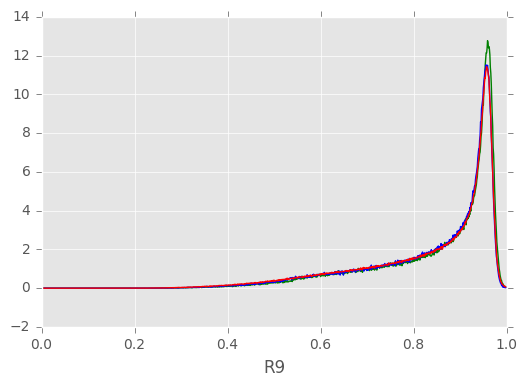

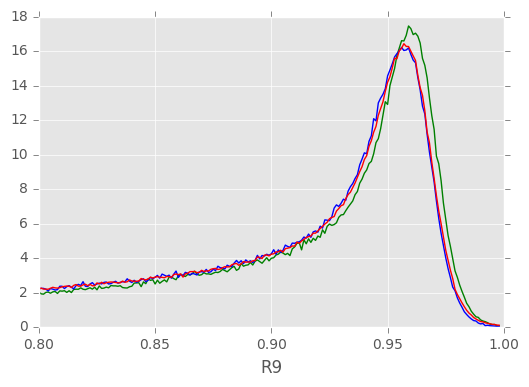

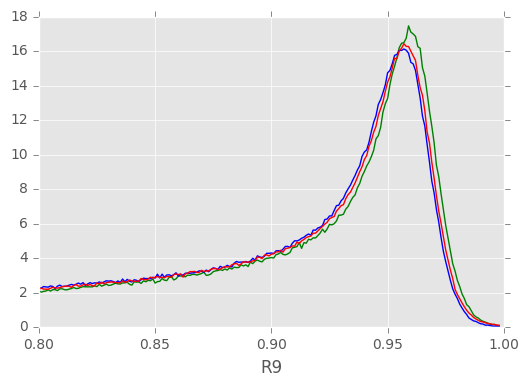

In [17]:
# dfmc = dfmc.query('-1.44 < ScEta and ScEta < 1.44')
# dfdata = dfdata.query('-1.44 < ScEta and ScEta < 1.44')
# dfmc   = dfmc.query('ScEta <-1.57 or 1.57 < ScEta')
# dfdata = dfdata.query('ScEta <-1.57 or 1.57 < ScEta')

print ylist
for yvar in ylist:
    yvarcorr = yvar+"_corr"
    print "plotting ", yvar

    rv = []
    if yvar == "R9":
        rv  = np.arange(0.0,1.0,0.001)
        rv2 = np.arange(0.8,1.0,0.001)
    if yvar == "S4":
        rv  = np.arange(0.0,1.0,0.001)
        rv2 = np.arange(0.8,1.0,0.001)
    if yvar == "SigmaIeIe":
        rv = np.arange(0.0,0.015,0.0001)
        rv2 = np.arange(0.015,0.030,0.0001)
    if yvar == "EtaWidth":
        rv = np.arange(0.0,0.05,0.0001)
        rv2 = np.arange(0.005,0.025,0.0001)
    if yvar == "PhiWidth":
        rv = np.arange(0.0,0.2,0.001)
        rv2 = np.arange(0.0,0.05,0.0003)
    if yvar == "CovarianceIphiIphi":
        rv  = np.arange(0.0, 0.02,0.0001)
        rv2 = np.arange(0.02, 0.05,0.0005)
    if yvar == "SigmaRR":
        rv = np.arange(1, 12.0,0.1) 
        rv2 = np.arange(1, 12.0,0.1)
    if yvar == "CovarianceIetaIphi":
        rv = np.arange(-0.0002, 0.0002,0.0000001) 
        rv2 = np.arange(-0.00005, 0.00005,0.0000001)
    if yvar == "PhoIso03":
        rv = np.arange(-0.05, 0.05,0.0005) 
        rv2 = np.arange(0.1, 5.0,0.05)
    if yvar == "ChIso03":
        rv = np.arange(-0.05, 0.05,0.0005) 
        rv2 = np.arange(0.1, 5.,0.05)
    if yvar == "ChIso03worst":
        rv = np.arange(-0.05, 0.05,0.0005) 
        rv2 = np.arange(0.1, 5.0, 0.05)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xlabel(yvar)
    mc_bins, _edges = np.histogram(dfmc[yvar], rv, weights=dfmc['weight'], normed = 1)
    edges = _edges[:len(_edges)-1]
    plt.plot(edges,mc_bins,"g")
    mccorr_bins, _edges = np.histogram(dfmc[yvarcorr], rv, weights=dfmc['weight'], normed = 1)
    edges = _edges[:len(_edges)-1]
    plt.plot(edges,mccorr_bins,"b")
    data_bins, _edges = np.histogram(dfdata[yvar], rv, normed = 1)
    edges = _edges[:len(_edges)-1]
    plt.plot(edges  ,data_bins,"r")

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xlabel(yvar)
    mc_bins, _edges = np.histogram(dfmc[yvar], rv2, weights=dfmc['weight'], normed = 1)
    edges = _edges[:len(_edges)-1]
    plt.plot(edges,mc_bins,"g")
    mccorr_bins, _edges = np.histogram(dfmc[yvarcorr], rv2, weights=dfmc['weight'], normed = 1)
    edges = _edges[:len(_edges)-1]
    plt.plot(edges,mccorr_bins,"b")
    data_bins, _edges = np.histogram(dfdata[yvar], rv2, normed = 1)
    edges = _edges[:len(_edges)-1]
    plt.plot(edges  ,data_bins,"r")

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xlabel(yvar)
    mc_bins, _edges = np.histogram(dfmc[yvar], rv2, normed = 1)
    edges = _edges[:len(_edges)-1]
    plt.plot(edges,mc_bins,"g")
    mccorr_bins, _edges = np.histogram(dfmc[yvarcorr], rv2, normed = 1)
    edges = _edges[:len(_edges)-1]
    plt.plot(edges,mccorr_bins,"b")
    data_bins, _edges = np.histogram(dfdata[yvar], rv2, normed = 1)
    edges = _edges[:len(_edges)-1]
    plt.plot(edges  ,data_bins,"r")
   
    
# mc_bins, _edges = np.histogram(y_mc, rv, normed = 1)
# edges = _edges[:len(_edges)-1]
# plt.plot(edges,mc_bins,"g")
# mccorr_bins, _edges = np.histogram(y_mccorr, rv, normed = 1)
# edges = _edges[:len(_edges)-1]
# plt.plot(edges,mccorr_bins,"b")
# data_bins, _edges = np.histogram(y_data, rv, normed = 1)b

# edges = _edges[:len(_edges)-1]
# plt.plot(edges  ,data_bins,"r")